In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
If you are not using Colab. First install and import TensorFlow and Keras

> conda install tensorflow

> conda install pip

> pip install --upgrade tensorflow==2.0.0-rc1

In [2]:
import tensorflow as tf
from tensorflow import keras

2024-12-03 15:01:53.363953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733218313.410063   30721 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733218313.423367   30721 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 15:01:53.462382: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

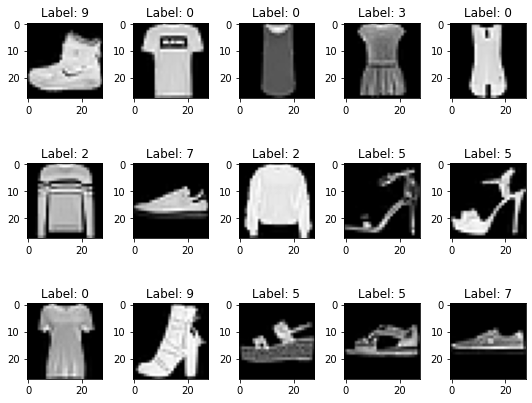

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


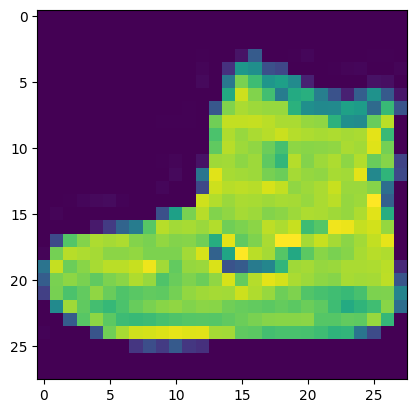

In [18]:
plt.imshow(X_train_full[0])

In [19]:
print(y_train_full[0])
y_train_full[0]

9


np.uint8(9)

### Labels and Description mapping

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train_full[0]]

'Ankle boot'

In [22]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [ ]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [ ]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>


### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

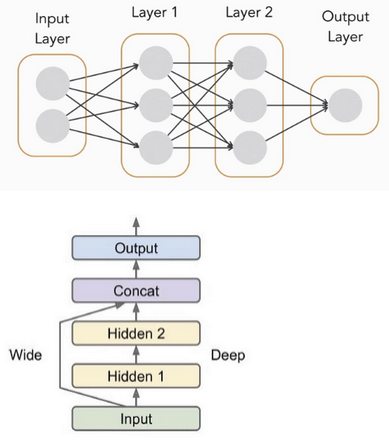

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

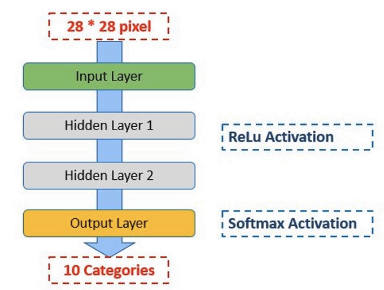

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


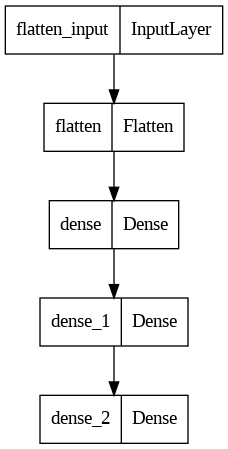

In [ ]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights

array([[ 0.03682212, -0.01364163,  0.04992647, ...,  0.05046479,
         0.0353944 ,  0.02487473],
       [ 0.04697908, -0.06508549,  0.03321294, ..., -0.06062458,
         0.0440559 ,  0.03838892],
       [ 0.03747176, -0.06481142, -0.04647093, ..., -0.06213623,
         0.0686415 , -0.0430199 ],
       ...,
       [ 0.02809224, -0.0324734 , -0.02461908, ...,  0.03032038,
        -0.02009234, -0.06011907],
       [-0.0423454 ,  0.02210206,  0.01144227, ...,  0.07341082,
         0.06197783, -0.01532439],
       [ 0.05958414,  0.06041023, -0.07180654, ...,  0.02446087,
         0.00364313,  0.06043409]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

Documentation - https://keras.io/models/sequential/

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 0.7404 - accuracy: 0.7539 - val_loss: 0.5339 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4984 - accuracy: 0.8246 - val_loss: 0.4428 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4515 - accuracy: 0.8412 - val_loss: 0.5289 - val_accuracy: 0.8054
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4254 - accuracy: 0.8514 - val_loss: 0.4009 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4064 - accuracy: 0.8579 - val_loss: 0.3860 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3873 - accuracy: 0.8639 - val_loss: 0.3819 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3743 - accuracy: 0.8676 - val_loss: 0.3743 - val_accuracy

In [ ]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
model_history.history

{'loss': [0.7403984665870667,
  0.4983636736869812,
  0.4515458941459656,
  0.42537298798561096,
  0.4064088463783264,
  0.3873484432697296,
  0.37428057193756104,
  0.3622409403324127,
  0.350780189037323,
  0.34109777212142944,
  0.33229029178619385,
  0.32238537073135376,
  0.3149562478065491,
  0.30836817622184753,
  0.30016592144966125,
  0.29455432295799255,
  0.28806495666503906,
  0.28161323070526123,
  0.27665024995803833,
  0.2710784375667572,
  0.26561009883880615,
  0.26048168540000916,
  0.25568366050720215,
  0.2511948347091675,
  0.24670200049877167,
  0.2420443296432495,
  0.23856699466705322,
  0.23467515408992767,
  0.2298995554447174,
  0.22614167630672455],
 'accuracy': [0.7538545727729797,
  0.8245636224746704,
  0.8412181735038757,
  0.8514000177383423,
  0.8579272627830505,
  0.863945484161377,
  0.8676000237464905,
  0.8712727427482605,
  0.8762727379798889,
  0.87867271900177,
  0.8818181753158569,
  0.8849272727966309,
  0.8871636390686035,
  0.889490902423858

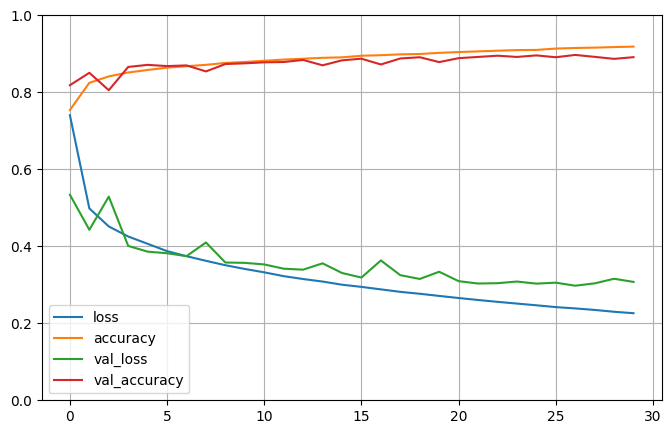

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3386 - accuracy: 0.8810


[0.3385954201221466, 0.8809999823570251]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 285ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [1]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

NameError: ignored

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(size=(28, 28))


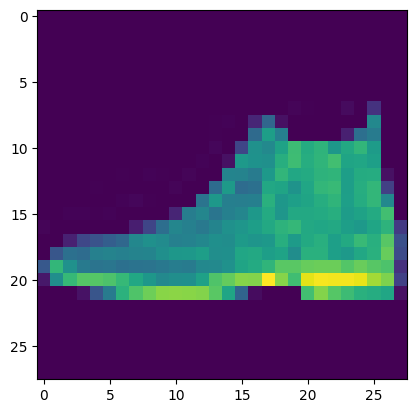

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


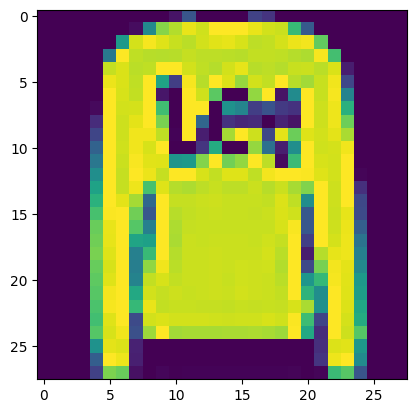

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(size=(28, 28))


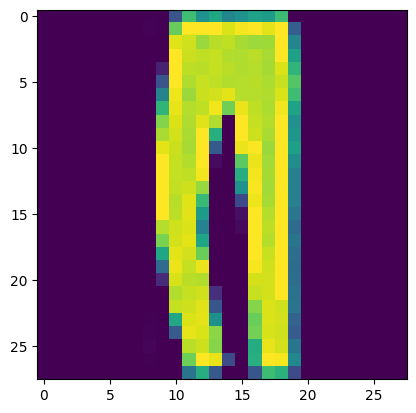

In [ ]:
print(plt.imshow(X_test[2]))